In [1]:
import scipy.io
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from rbm import RBM


In [2]:
mat = scipy.io.loadmat('binaryalphadigs.mat')
data = np.array(mat['dat'])

In [3]:
# lire_alpha_digits
def read_alpha_digits(data, digits):
    """Read digits from the AlphaDigits dataset

    Parameters
    ----------
    data : np.array
    digits : List[int]
        Indexes of the digit classes to read

    Returns
    -------
    np.array
        Array of all the samples from requested digits, in binary array form 
    """    
    read_data = np.take(data.copy(), digits, axis=0)
    read_data = np.reshape(read_data, (len(digits) * read_data.shape[1]))
    return np.array(list(read_data))

# read_alpha_digits(data, [10, 11, 12])

In [4]:
def display_samples(X, n_rows = 10, n_cols = 10, fig_x=10, fig_y=10):
    """
    Display a grid of samples.
    Samples are chosen randomly if there are more samples than n_rows X n_cols.
    """

    # Configs
    plt.figure(figsize=(fig_x,fig_y)) ## Create figure
    n = X.shape[0] # Obtain number of samples to display

    if n <= n_rows * n_cols: 
        # If number of samples fits in the columns/rows
        samples_idx = np.arange(n)
        if n < n_rows * n_cols:
            n_rows = n // n_cols + 1
    else: 
        # If not, choose randomly which images to show
        samples_idx = np.random.choice(n, size=n_rows * n_cols, replace=False)

    for k, idx in enumerate(samples_idx):
        plt.subplot(n_rows, n_cols, k+1)
        plt.imshow(X[idx], cmap=plt.get_cmap('gray'))

        # Hide ticks
        # plt.axis('off')
        plt.xticks([], [])
        plt.yticks([], [])

    plt.show()


digits = read_alpha_digits(data, [10, 11, 12])
# display_samples(digits)

## Test bench

In [5]:
input_digit_idx = [10,11,12]
digits = read_alpha_digits(data, input_digit_idx)

In [6]:
# display_samples(digits)
print(digits.shape)

(117, 20, 16)


In [8]:
digits_vecs = digits.reshape(len(input_digit_idx)*39,20*16)

print(digits_vecs.shape)
print(digits.shape)

(117, 320)
(117, 20, 16)


In [9]:
# ---------
# Constants
# ---------
# Data dample dim
p = 20*16 # For Binary AlphaDigits
# Latent vector dim
q = 100

rbm = RBM(p,q)
rbm.train_RBM(digits_vecs, batch_size=4, n_epoch=100, verbose=True)

Epoch: 1/100
Reconstruction error:  0.16637921090544716
Epoch: 2/100
Reconstruction error:  0.14053936043086648
Epoch: 3/100
Reconstruction error:  0.12624915394741593
Epoch: 4/100
Reconstruction error:  0.12171404354233542
Epoch: 5/100
Reconstruction error:  0.11058952562482777
Epoch: 6/100
Reconstruction error:  0.10413672470686458
Epoch: 7/100
Reconstruction error:  0.09729779583856499
Epoch: 8/100
Reconstruction error:  0.09232198380173819
Epoch: 9/100
Reconstruction error:  0.08736019526513893
Epoch: 10/100
Reconstruction error:  0.08480236046218642
Epoch: 11/100
Reconstruction error:  0.07872152425414809
Epoch: 12/100
Reconstruction error:  0.07496152678566917
Epoch: 13/100
Reconstruction error:  0.07306951374829208
Epoch: 14/100
Reconstruction error:  0.06796480079623078
Epoch: 15/100
Reconstruction error:  0.0654137625298455
Epoch: 16/100
Reconstruction error:  0.06301095639197633
Epoch: 17/100
Reconstruction error:  0.06138688812850614
Epoch: 18/100
Reconstruction error:  0.05

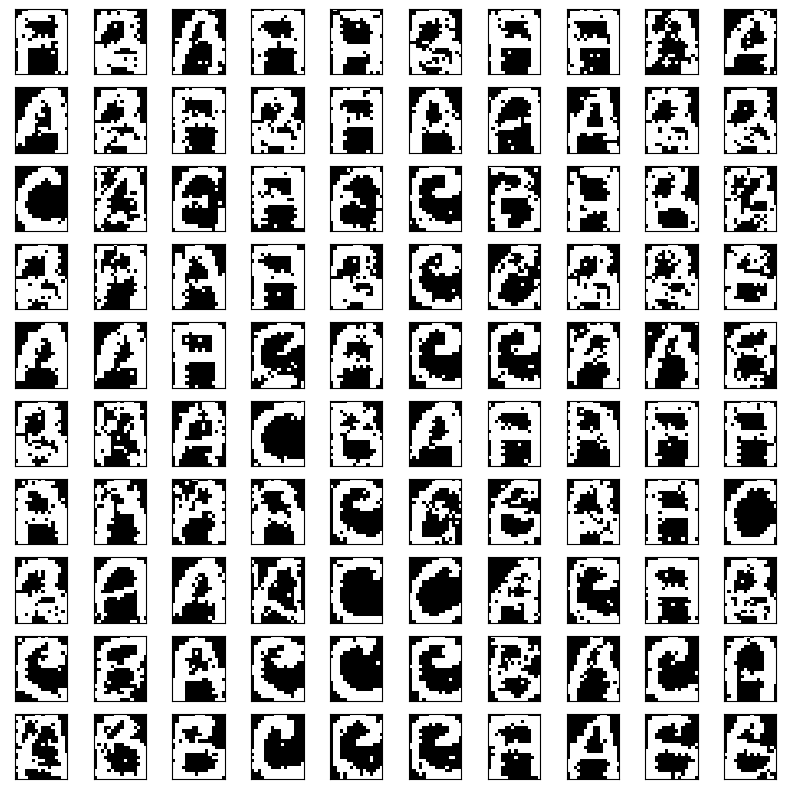

In [10]:
out = rbm.generate_data(100, nb_iter_gibbs=100, random_init=True)
display_samples(out)

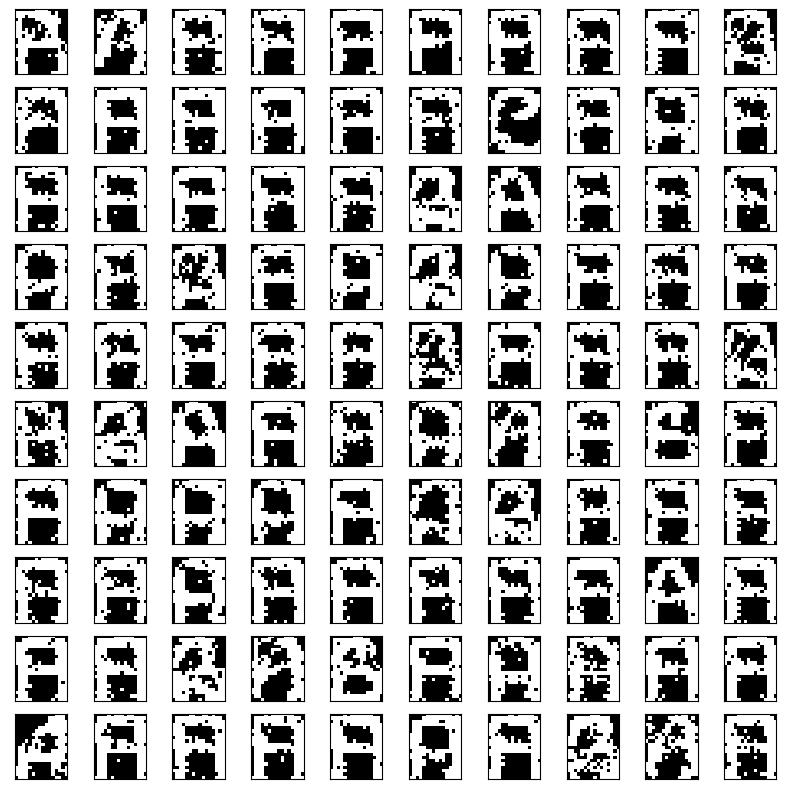

In [11]:
out = rbm.generate_data(100, nb_iter_gibbs=100, random_init=False)
display_samples(out)

# Analyse de l'erreur de reconstruction

### Dimensionality of hidden layer (q)

        q #characters  Reconstruction Error
0    20.0           1              0.065878
1    40.0           1              0.023710
2    60.0           1              0.009461
3    80.0           1              0.006167
4   100.0           1              0.003127
5   120.0           1              0.002163
6   140.0           1              0.001438
7   160.0           1              0.001127
8   180.0           1              0.000988
9    20.0           2              0.083984
10   40.0           2              0.039255
11   60.0           2              0.018120
12   80.0           2              0.008671
13  100.0           2              0.005254
14  120.0           2              0.003857
15  140.0           2              0.002492
16  160.0           2              0.001736
17  180.0           2              0.001439
18   20.0           3              0.086422
19   40.0           3              0.051327
20   60.0           3              0.027189
21   80.0           3           

<AxesSubplot:xlabel='q', ylabel='Reconstruction Error'>

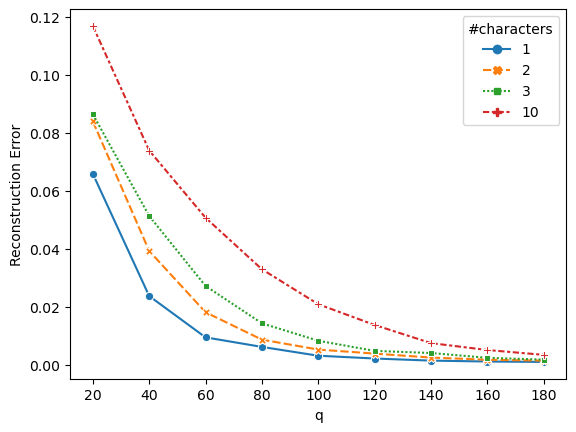

In [14]:
p = 20 * 16
errors = []

for n_digits in [1, 2, 3, 10]:
    digits = read_alpha_digits(data, list(range(10, 10+n_digits)))
    digits_vecs = digits.reshape((-1, 20*16))
    for q in range(20, 200, 20):
        rbm = RBM(p, q)
        rbm.train_RBM(digits_vecs, batch_size=4, n_epoch=100, verbose=False)
        
        errors.append([q, n_digits, np.mean(np.power(digits_vecs - rbm.decode(rbm.encode(digits_vecs)),2))])

df_q = pd.DataFrame(np.array(errors), columns=['q', '#characters', 'Reconstruction Error'])
df_q['#characters'] = df_q['#characters'].astype('int').astype('str')
print(df_q)
sns.lineplot(data=df_q, x='q', y='Reconstruction Error', hue='#characters', style='#characters', markers=True, dashes=True)
# y: reconstruction error
# x: number of hidden units

### Batch size

    Batch size #characters  Reconstruction Error
0          1.0           1              0.001241
1         11.0           1              0.011388
2         21.0           1              0.025285
3         31.0           1              0.030067
4         41.0           1              0.051057
5         51.0           1              0.050256
6         61.0           1              0.052436
7         71.0           1              0.050758
8         81.0           1              0.050664
9         91.0           1              0.051646
10       101.0           1              0.052095
11       111.0           1              0.048934
12         1.0           2              0.002800
13        11.0           2              0.021279
14        21.0           2              0.034440
15        31.0           2              0.043950
16        41.0           2              0.057022
17        51.0           2              0.056418
18        61.0           2              0.060032
19        71.0      

<AxesSubplot:xlabel='Batch size', ylabel='Reconstruction Error'>

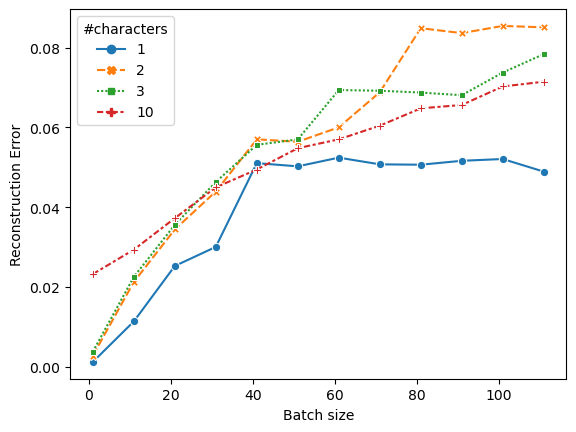

In [15]:
q = 100
errors_batch_size = []

for n_digits in [1, 2, 3, 10]:
    digits = read_alpha_digits(data, list(range(10, 10+n_digits)))
    digits_vecs = digits.reshape((-1, 20*16))

    for batch_size in range(1, 120, 10):
        rbm = RBM(p, q)
        rbm.train_RBM(digits_vecs, batch_size=batch_size, n_epoch=100, verbose=False)
        
        errors_batch_size.append([batch_size, n_digits, np.mean(np.power(digits_vecs - rbm.decode(rbm.encode(digits_vecs)),2))])

df_bs = pd.DataFrame(np.array(errors_batch_size), columns=['Batch size', '#characters', 'Reconstruction Error'])
df_bs['#characters'] = df_bs['#characters'].astype('int').astype('str')
print(df_bs)
sns.lineplot(data=df_bs, x='Batch size', hue='#characters', y='Reconstruction Error', style='#characters', markers=True, dashes=True)
# y: reconstruction error
# x: batch size


## Analyse en fonction du nombre de caractères à apprendre

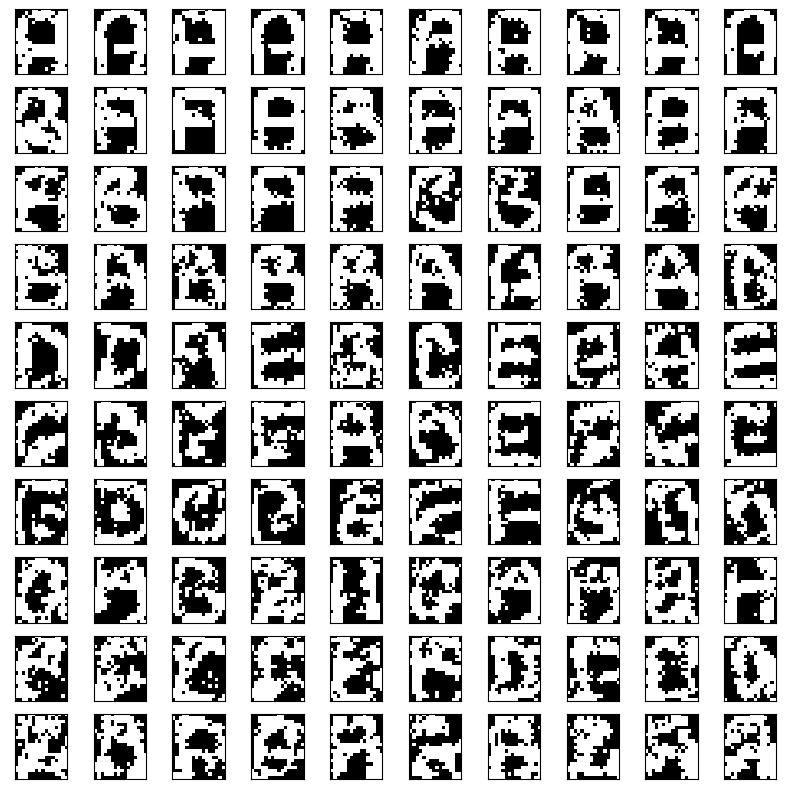

In [16]:
# random init True
p = 20*16
q = 100
batch_size=4
errors = []
outs = []
for n_digits in range(1, 11):
    digits_vecs = read_alpha_digits(data, list(range(10, 10+n_digits))).reshape((-1, 20*16))

    rbm = RBM(p, q)
    rbm.train_RBM(digits_vecs, batch_size=batch_size, n_epoch=100, verbose=False)
    errors.append(np.mean(np.power(digits_vecs - rbm.decode(rbm.encode(digits_vecs)),2)))
    outs.extend(rbm.generate_data(10, nb_iter_gibbs=100))

display_samples(np.array(outs), n_cols=10, n_rows=10, fig_x=10, fig_y=10)

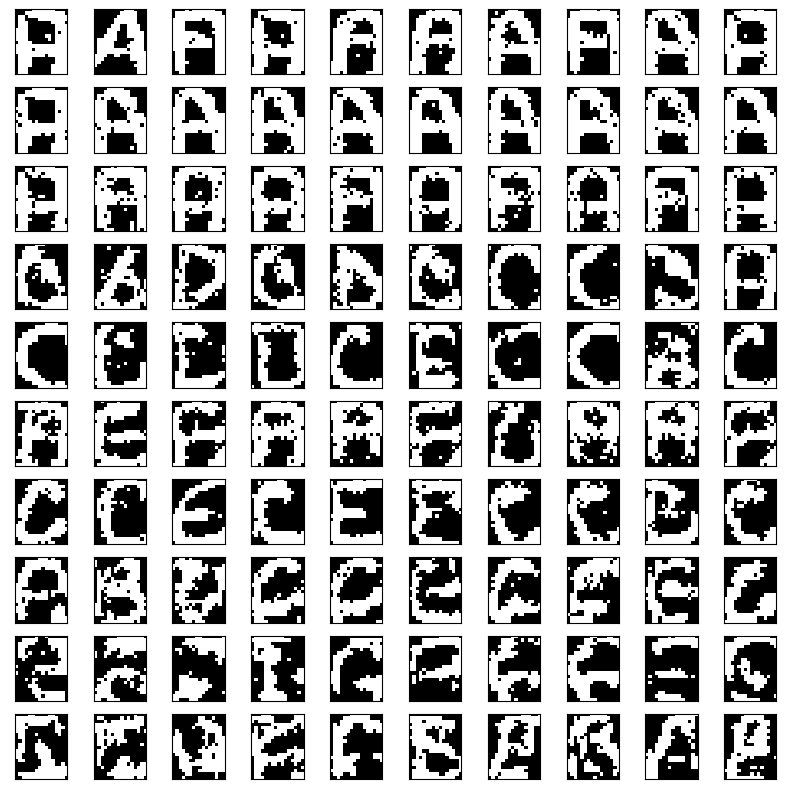

In [18]:
# random init False
p = 20*16
q = 100
batch_size=4
errors = []
outs = []
for n_digits in range(1, 11):
    digits_vecs = read_alpha_digits(data, list(range(10, 10+n_digits))).reshape((-1, 20*16))

    rbm = RBM(p, q)
    rbm.train_RBM(digits_vecs, batch_size=batch_size, n_epoch=100, verbose=False)
    errors.append(np.mean(np.power(digits_vecs - rbm.decode(rbm.encode(digits_vecs)),2)))
    outs.extend(rbm.generate_data(10, nb_iter_gibbs=1000, random_init=True))

display_samples(np.array(outs), n_cols=10, n_rows=10, fig_x=10, fig_y=10)

# Analyse avec MNIST

In [19]:
mnist = datasets.fetch_openml('mnist_784')

In [20]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy().astype('int')

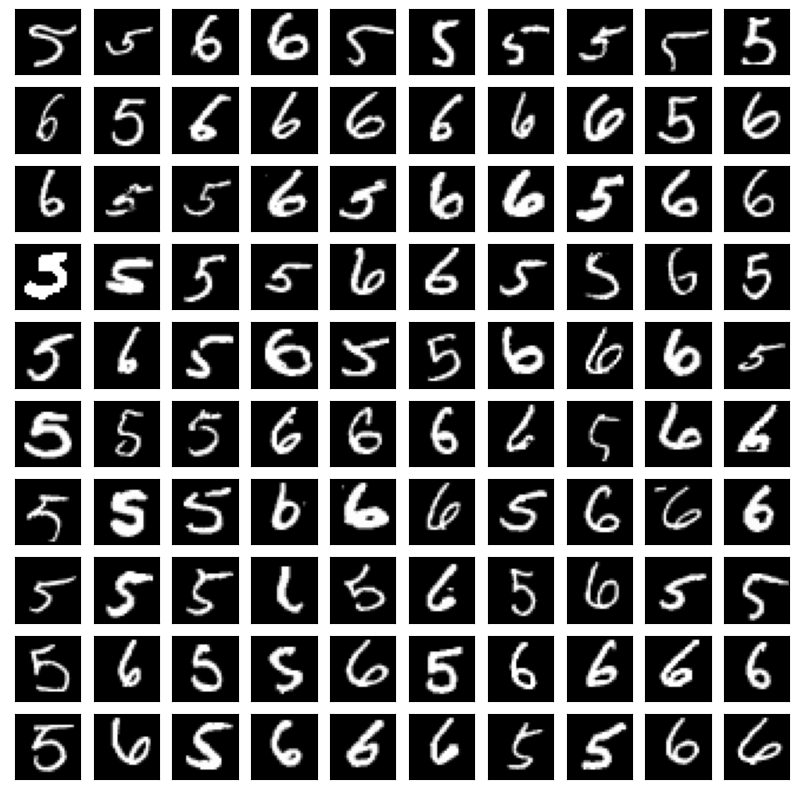

In [21]:
def get_mnist_digits(X, y, digits=[0]):
    idx = np.where(np.isin(y, np.array(digits)))[0]
    return X[idx], y[idx]

display_samples(get_mnist_digits(X, y, digits=[5, 6])[0].reshape((-1, 28, 28)))

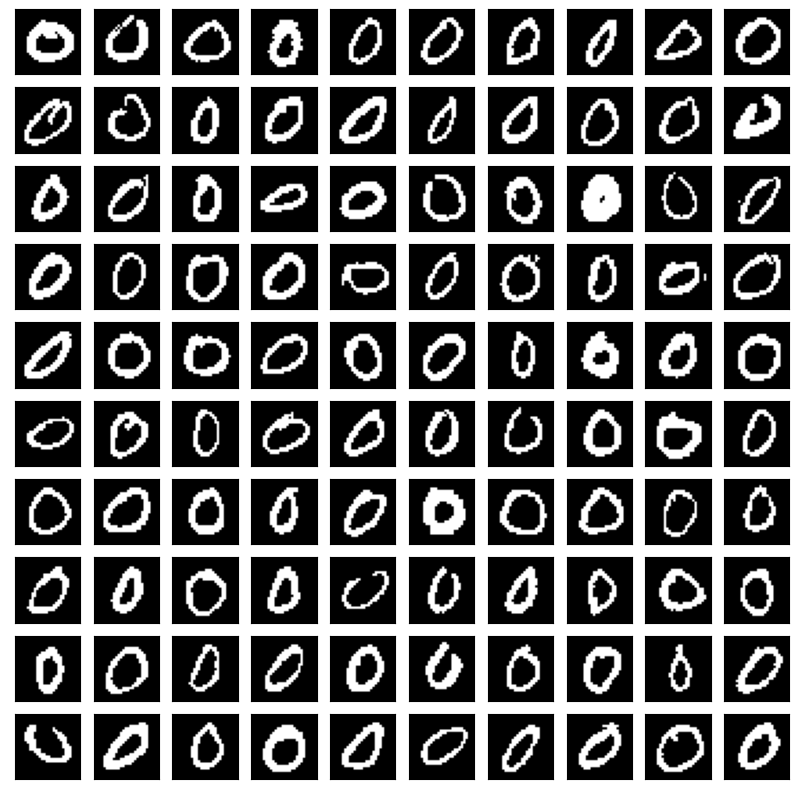

In [22]:
digits = get_mnist_digits(X, y, digits=[0])[0]
#Make digits binary
digits_bin = (digits > 128) * 1
display_samples(digits_bin.reshape((-1, 28, 28)))

In [23]:
X_train, X_test = train_test_split(digits_bin, train_size=0.3, shuffle=True)

In [24]:
X_train.shape, X_test.shape

((2070, 784), (4833, 784))

In [25]:
# Train a RBM in MNIST
p = 28*28
q = 800
rbm = RBM(p, q)
rbm.train_RBM(X_train, batch_size=256, n_epoch=100, verbose=True)


Epoch: 1/100
Reconstruction error:  0.05758408265396013
Epoch: 2/100
Reconstruction error:  0.0501055198782541
Epoch: 3/100
Reconstruction error:  0.04302747840716561
Epoch: 4/100
Reconstruction error:  0.04032782084318985
Epoch: 5/100
Reconstruction error:  0.03793170579949365
Epoch: 6/100
Reconstruction error:  0.03612729090681079
Epoch: 7/100
Reconstruction error:  0.0341161129135911
Epoch: 8/100
Reconstruction error:  0.03250874148610138
Epoch: 9/100
Reconstruction error:  0.03142187719670691
Epoch: 10/100
Reconstruction error:  0.02947932286038416
Epoch: 11/100
Reconstruction error:  0.029991633490982685
Epoch: 12/100
Reconstruction error:  0.0278361449939542
Epoch: 13/100
Reconstruction error:  0.029000304975576097
Epoch: 14/100
Reconstruction error:  0.02690925125640556
Epoch: 15/100
Reconstruction error:  0.025781664465089404
Epoch: 16/100
Reconstruction error:  0.025064928063642293
Epoch: 17/100
Reconstruction error:  0.0244954221618738
Epoch: 18/100
Reconstruction error:  0.0

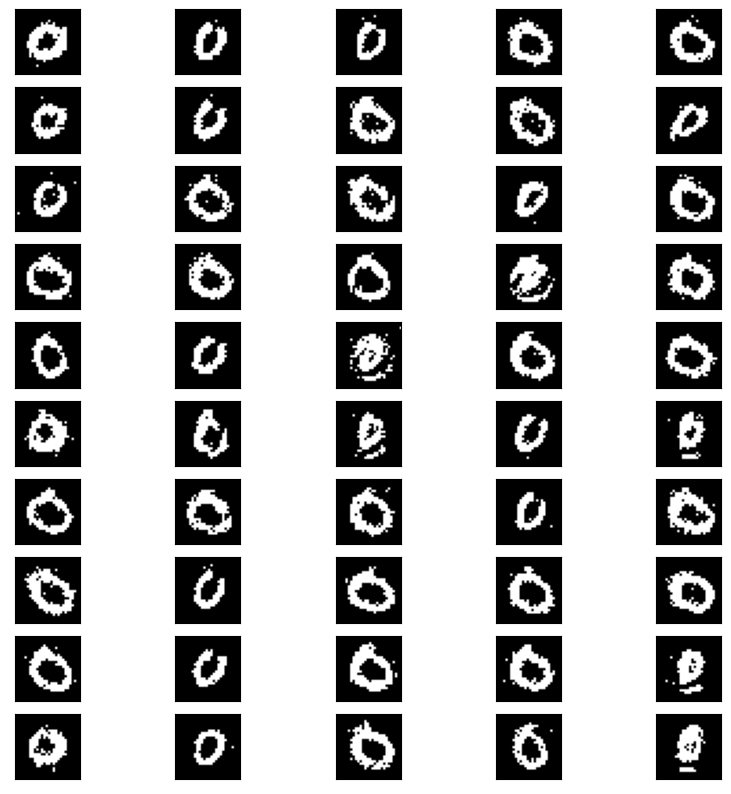

In [26]:
out = rbm.generate_data(50, nb_iter_gibbs=1000, height=28, width=28)
display_samples(out, n_cols=5, n_rows=10)

1
2
3
4
5
6
7
8
9
10


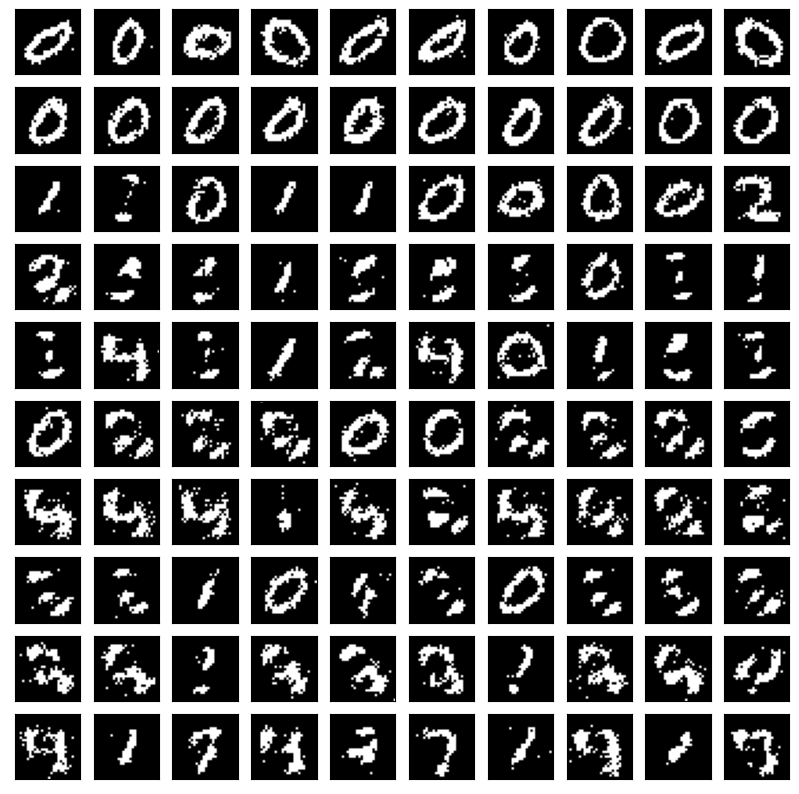

In [27]:
#n_digits = range(1, 11)
q=800
outs = []
errs = []
for n_digit in range(1, 11):
    print(n_digit)
    digits = get_mnist_digits(X, y, list(range(0, n_digit)))[0]
    digits_bin = (digits > 128)*1

    X_train, _ = train_test_split(digits_bin, train_size=1000, shuffle=True)
    rbm = RBM(28*28, q)
    rbm.train_RBM(X_train, batch_size=256, n_epoch=100, verbose=False)
    errs.append(np.mean(np.power(X_train - rbm.decode(rbm.encode(X_train)),2)))
    outs.extend(rbm.generate_data(10, nb_iter_gibbs=1000, random_init=True, height=28, width=28))

display_samples(np.array(outs), n_cols=10, n_rows=10, fig_x=10, fig_y=10)

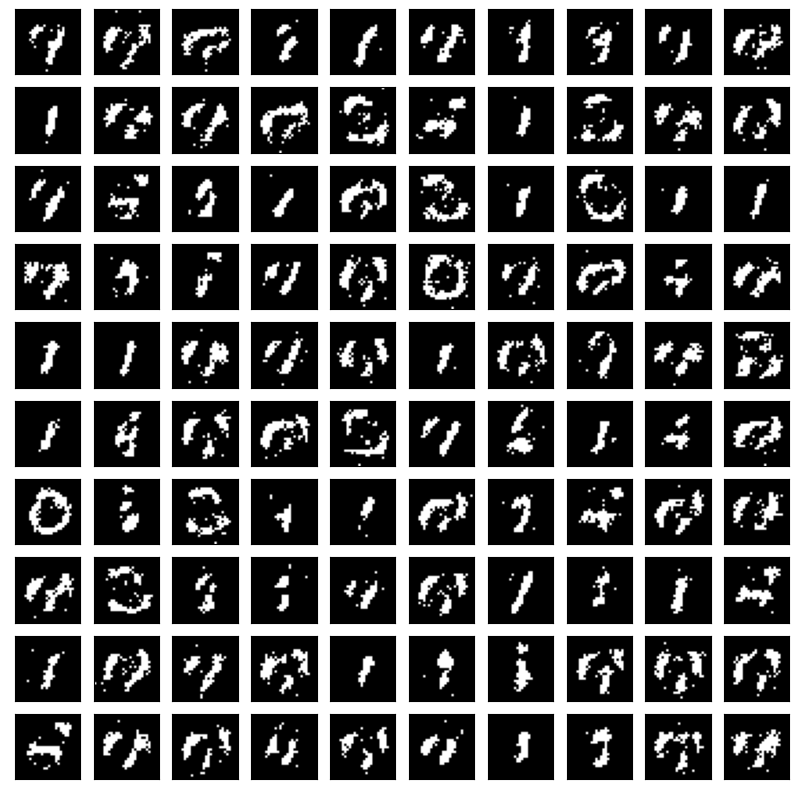

In [ ]:
display_samples(rbm.generate_data(100, nb_iter_gibbs=1000, random_init=True, height=28, width=28))

Text(0, 0.5, 'Reconstruction Error')

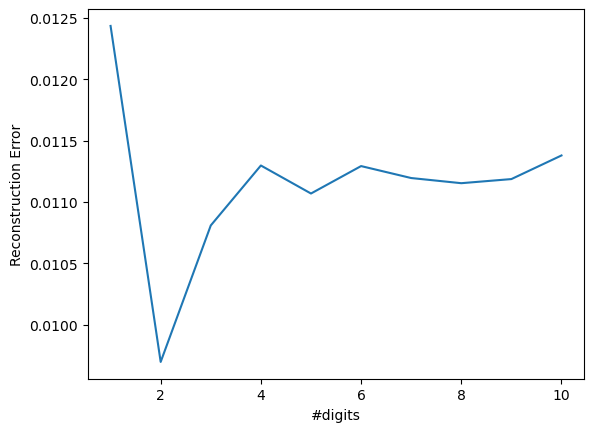

In [ ]:
sns.lineplot(x=range(1, 11), y=errs)
plt.xlabel('#digits')
plt.ylabel("Reconstruction Error")